### Capítulo 2 - Resumo dos Dados

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
def typecast_float(value):
    try:
        return float(value.replace(',', ''))
    except:
        return value

In [38]:
tabela21 = pd.read_excel('dados/Dados_EB.xls', sheet_name='Tabela 2.1')
CDBrasil = pd.read_excel('dados/Dados_EB.xls', sheet_name='CD-Brasil', converters={'Unnamed: 2': typecast_float, 'Unnamed: 3': typecast_float}) 
CDMunicipios = pd.read_excel('dados/Dados_EB.xls', sheet_name='CD-Municipios')

In [39]:
def tabela_frequencia(tabela, coluna): 
    '''
    Função que gera tabela de distribuição de frequências para a coluna de uma tabela desejada.
    '''
    if type(tabela[f'{coluna}'][0]) == str:
        freq_abs = tabela[f'{coluna}'].value_counts()
        freq_rel = tabela[f'{coluna}'].value_counts(normalize=True)*100
        freq_acum = freq_rel.cumsum()
        dist_freq = pd.DataFrame({'Frequência Absoluta': freq_abs, 'Frequência Relativa': round(freq_rel,2), 'Frequência Acumulada': round(freq_acum,2)})
        return dist_freq
    else:
        k = round(1 + np.log2(len(tabela[f'{coluna}']))) # número de classes
        lsup = tabela[f'{coluna}'].max() # limite superior
        linf = tabela[f'{coluna}'].min() # limite inferior
        amplitude = lsup - linf # amplitude
        intervalo = amplitude/k # intervalo
        classes = []
        for i in range(k):
            classes.append(round(linf + i*intervalo, 2))

        labels = []
        for i in range(len(classes)-1):
            labels.append(f'{classes[i]} a {classes[i+1]}')

        frequencia = pd.value_counts(pd.cut(x=tabela[f'{coluna}'], bins=classes, labels=labels, include_lowest=True), sort=False)
        percentual = pd.value_counts(pd.cut(x = tabela[f'{coluna}'],bins = classes, labels = labels,include_lowest = True), normalize = True, sort=False)*100
        freq_acum = percentual.cumsum()

        dist_freq = pd.DataFrame({'Frequência Absoluta': frequencia, 'Frequência Relativa': round(percentual,2), 'Frequência Acumulada': round(freq_acum,2)})
        return dist_freq

#### 2. Usando os dados da Tabela 2.1, construa a distribuição de freqüências das variáveis:
(a) Estado civil.
(b) Região de procedência.
(c) Número de filhos dos empregados casados.
(d) Idade.

In [40]:
tabela21.rename(columns=tabela21.iloc[0],inplace=True)
tabela21.drop(tabela21.index[0], inplace=True)
tabela21 = tabela21.reset_index(drop=True)

In [41]:
tabela21.head()

,N,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Meses,Região de Procedência
0,1,solteiro,ensino fundamental,NaN,4,26,3,interior
1,2,casado,ensino fundamental,1,4.56,32,10,capital
2,3,casado,ensino fundamental,2,5.25,36,5,capital
3,4,solteiro,ensino médio,NaN,5.73,20,10,outra
4,5,solteiro,ensino fundamental,NaN,6.26,40,7,outra


##### Estado Civil

In [42]:
tabela_frequencia(tabela21, 'Estado Civil')

,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
casado,20,55.56,55.56
solteiro,16,44.44,100.00


##### Região de Procedência

In [43]:
tabela_frequencia(tabela21, 'Região de Procedência')

,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
outra,13,36.11,36.11
interior,12,33.33,69.44
capital,11,30.56,100.00


##### Número de filho dos empregados casados

In [44]:
tabela_casados = tabela21[tabela21['Estado Civil'] == 'casado'].reset_index(drop=True)
tabela_frequencia(tabela_casados, 'N de Filhos')

,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
0.0 a 1.0,9,47.37,47.37
1.0 a 2.0,7,36.84,84.21
2.0 a 3.0,3,15.79,100.00
3.0 a 4.0,0,0.00,100.00


##### Idade

In [45]:
tabela_frequencia(tabela21, 'Anos')

,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
20.0 a 24.67,2,6.06,6.06
24.67 a 29.33,6,18.18,24.24
29.33 a 34.0,10,30.30,54.55
34.0 a 38.67,7,21.21,75.76
38.67 a 43.33,8,24.24,100.00


#### 3. Para o conjunto Dados 1(CD-Brasil), construir distribuição de frequências para população urbana e densidade populacional.

In [46]:
CDBrasil.rename(columns=CDBrasil.iloc[3],inplace=True)
CDBrasil.drop(CDBrasil.index[0:4], inplace=True)
CDBrasil = CDBrasil.reset_index(drop=True)
CDBrasil.columns.values[0] = 'Região'
CDBrasil.columns.values[1] = 'Estado'
CDBrasil['Região'] = CDBrasil['Região'].astype(str)

In [47]:
# preencher valores vazios com o valor da célula acima
for i in range(0, len(CDBrasil)):
    if CDBrasil.iloc[i,0] == 'nan':
        CDBrasil.iloc[i,0] = CDBrasil.iloc[i-1,0]
    else:
        continue

##### População

In [48]:
tabela_frequencia(CDBrasil, 'População')

,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
395725.0 a 30994289.33,29,90.62,90.62
30994289.33 a 61592853.67,2,6.25,96.88
61592853.67 a 92191418.0,1,3.12,100.00
92191418.0 a 122789982.33,0,0.00,100.00
122789982.33 a 153388546.67,0,0.00,100.00


##### Densidade

In [49]:
tabela_frequencia(CDBrasil, 'Densidade')

,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
1.76 a 72.02,25,78.12,78.12
72.02 a 142.27,5,15.62,93.75
142.27 a 212.53,1,3.12,96.88
212.53 a 282.78,0,0.00,96.88
282.78 a 353.04,1,3.12,100.00


#### Para  o conjunto de números de erro de impressão: 
 - a) representar graficamente;
 - b) fazer histograma e ramo-e-folhas.

In [50]:
erros = [8, 11, 8, 12, 14, 13, 11, 14, 14, 15,
         6, 10, 14, 19, 6, 12, 7, 5, 8, 8,
         10, 16, 10, 12, 12, 8, 11, 6, 7, 12,
         7, 10, 14, 5, 12, 7, 9, 12, 11, 9,
         14, 8, 14, 8, 12, 10, 12, 22, 7, 15]

A) e B)

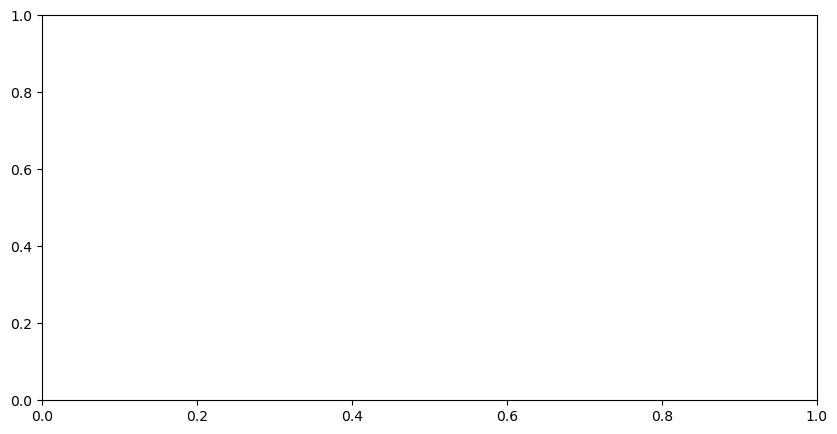

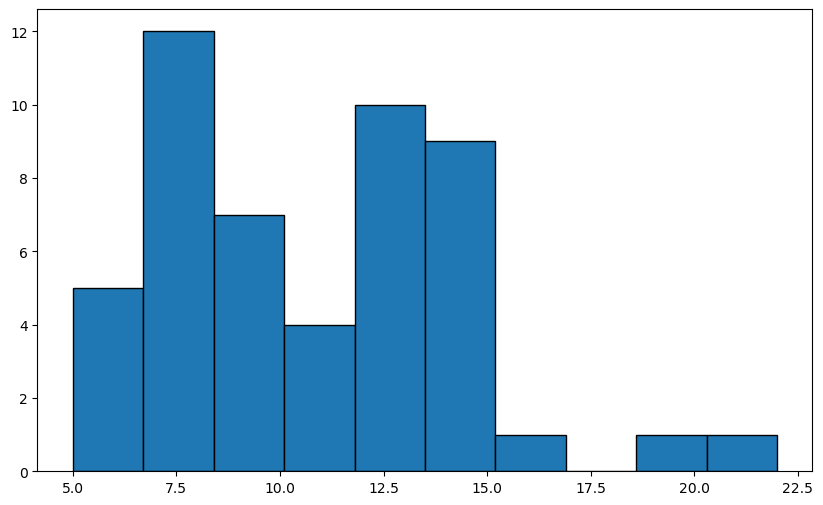

In [51]:
ax, fig = plt.subplots(figsize=(10,6))
plt.hist(erros, bins=(10), edgecolor='black')
plt.show()

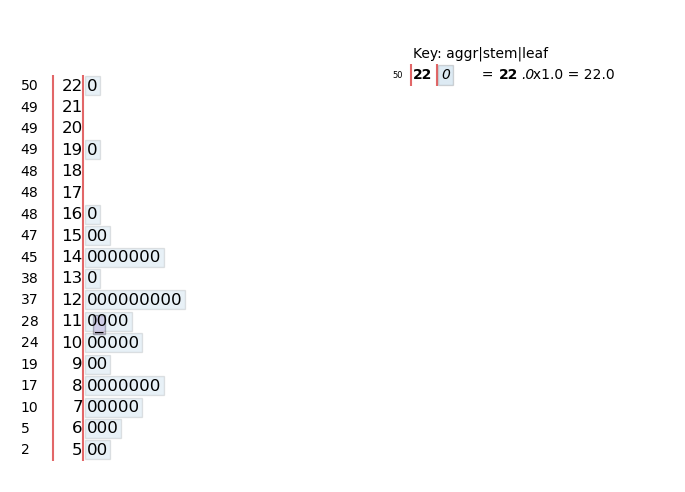

In [52]:
import stemgraphic

stemgraphic.stem_graphic(erros, scale=0)
plt.show()

##### 5) Usando resultados do problema 2 e tabela 2.3:
- a) fazer histrograma da idade;
- b) fazer um gráfico de grau de instrução

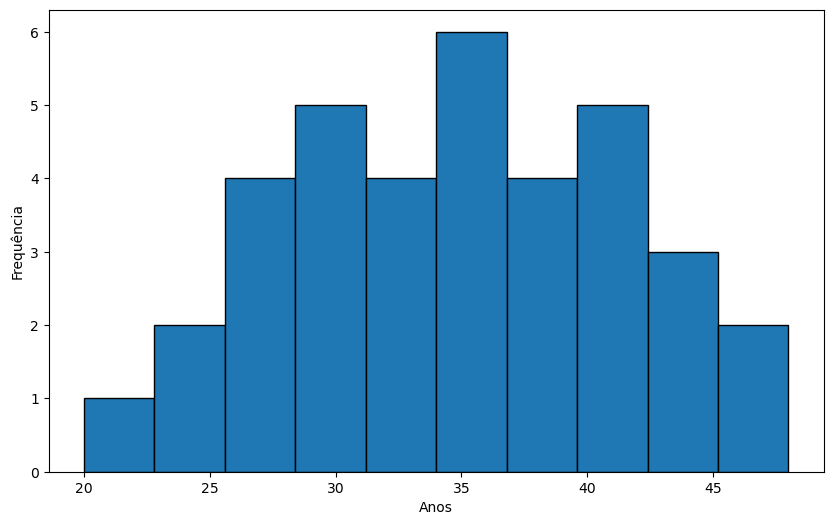

In [53]:
ax, fig = plt.subplots(figsize=(10,6))
plt.hist(tabela21['Anos'], bins=(10), edgecolor='black')
plt.xlabel('Anos')
plt.ylabel('Frequência')
plt.show()

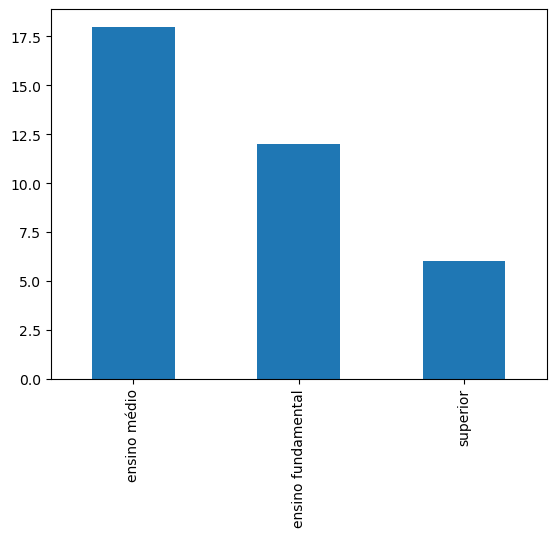

In [54]:
tabela21['Grau de Instrução'].value_counts().plot(kind='bar')
plt.show()

##### 6) Conforme dados da questão 6:
- a) Contruir histograma;
- b) Gráfico de dispersão unidimensional

In [55]:
incremento = [3.67, 1.82, 3.73, 4.10, 4.30,
              1.28, 8.14, 2.43, 4.17, 5.36,
              3.96, 6.54, 5.84, 7.35, 3.63,
              2.93, 2.82, 8.45, 5.28, 5.41,
              7.75, 4.65, 1.88, 2.12, 4.26,
              2.78, 5.54, 0.90, 5.09, 4.07]

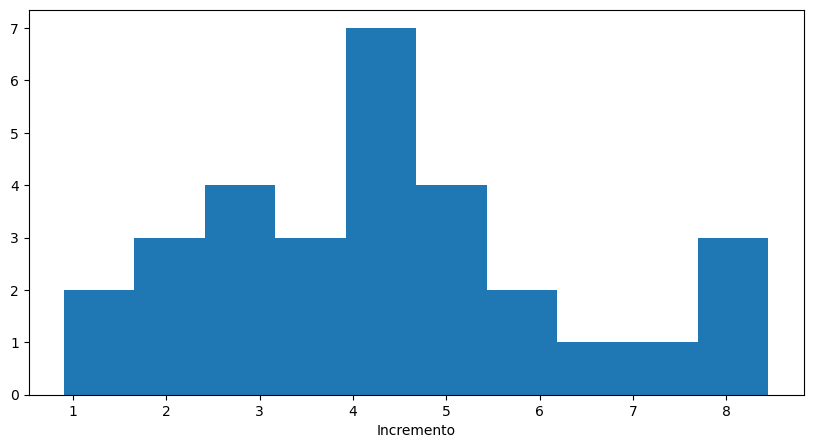

In [56]:
ax, fig = plt.subplots(figsize=(10, 5))
plt.hist(incremento)
plt.xlabel('Incremento')
plt.show()

In [57]:
df_incremento = pd.DataFrame({'Incremento':incremento})

In [58]:
tab_freq_inc = tabela_frequencia(df_incremento, 'Incremento')

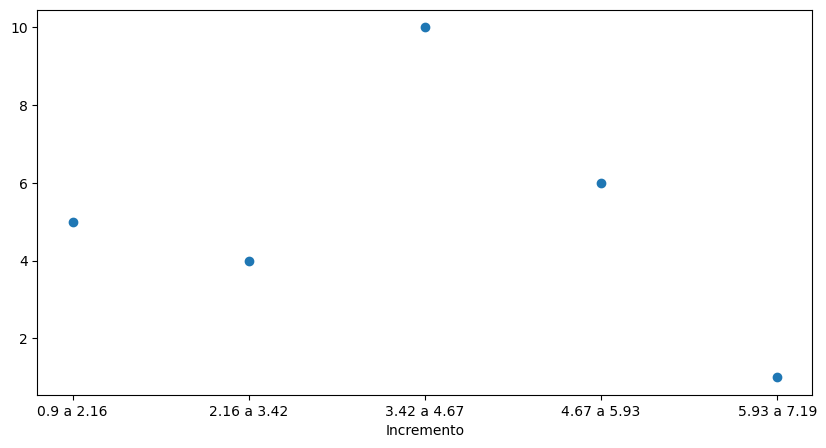

In [59]:
ax, fig = plt.subplots(figsize=(10, 5))
plt.scatter(tab_freq_inc.index, tab_freq_inc['Frequência Absoluta'])
plt.xlabel('Incremento')
plt.show()

##### 8 Construir histograma, ramo-e-folhas e dispersão unidimensional de CD-Municipios

In [60]:
CDMunicipios.rename(columns=CDMunicipios.iloc[3],inplace=True)
CDMunicipios.drop(CDMunicipios.index[0:4], inplace=True)
CDMunicipios = CDMunicipios.reset_index(drop=True)
CDMunicipios = CDMunicipios.drop(30)

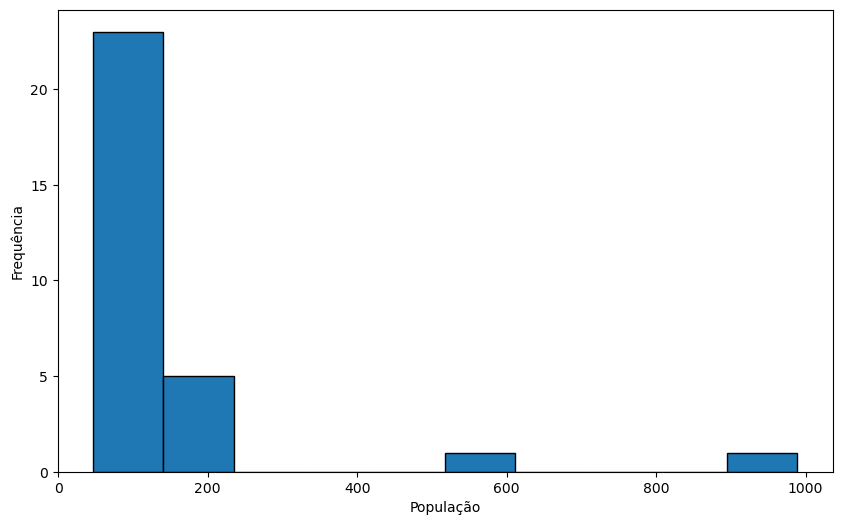

In [61]:
ax, fig = plt.subplots(figsize=(10,6))
plt.hist(CDMunicipios['População'], edgecolor='black')
plt.xlabel('População')
plt.ylabel('Frequência')
plt.show()

In [62]:
tab_freq_mun = tabela_frequencia(CDMunicipios, 'População')

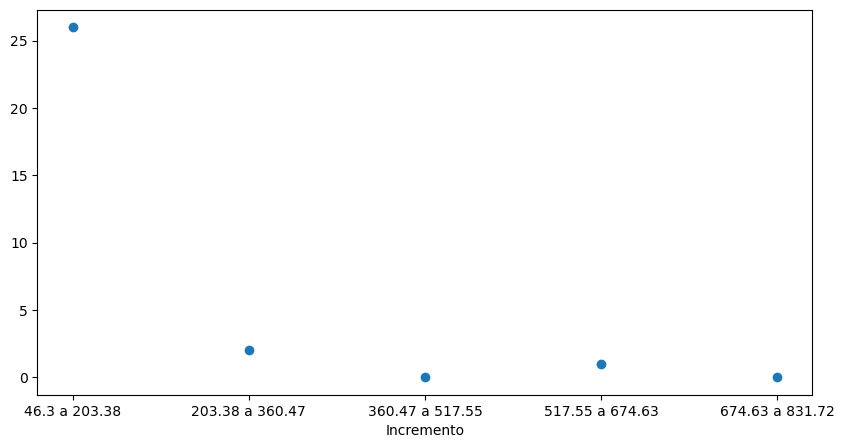

In [63]:
ax, fig = plt.subplots(figsize=(10, 5))
plt.scatter(tab_freq_mun.index, tab_freq_mun['Frequência Absoluta'])
plt.xlabel('Incremento')
plt.show()

##### 16) Com a tabela 2.1:
- a) distribuição de frequências para a variável idade.


In [68]:
tab_freq_idade = tabela_frequencia(tabela21, 'Anos')
tab_freq_idade

,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
20.0 a 24.67,2,6.06,6.06
24.67 a 29.33,6,18.18,24.24
29.33 a 34.0,10,30.30,54.55
34.0 a 38.67,7,21.21,75.76
38.67 a 43.33,8,24.24,100.00


- b) gráfico de porcentagem acumulada.

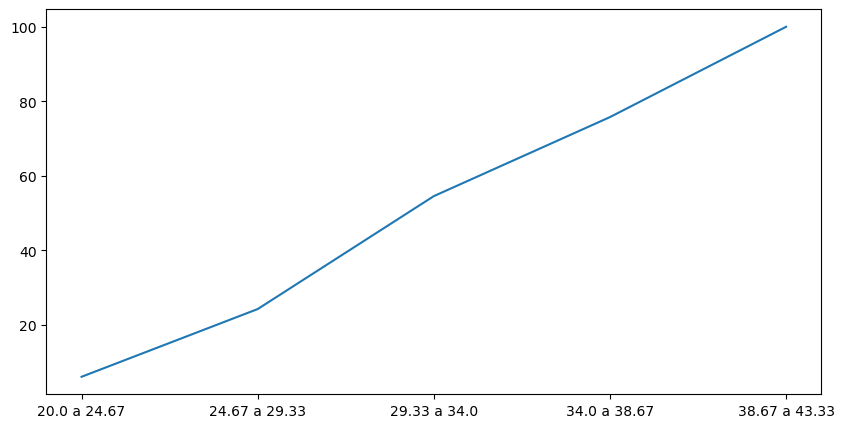

In [78]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(tab_freq_idade.index, tab_freq_idade['Frequência Acumulada'])
plt.show()

##### 18)Construir a f.d.e. para a variável idade referente aos dados da Tabela 2.1.

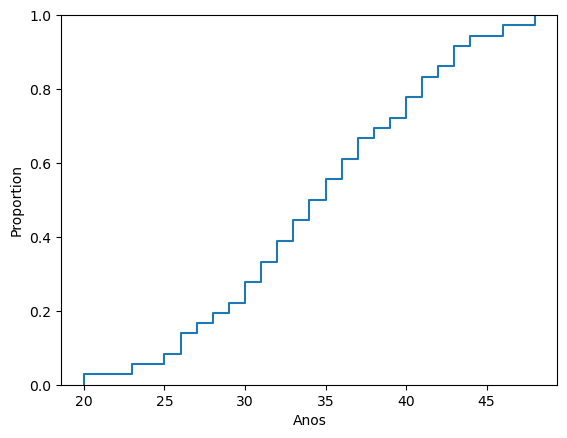

In [85]:
sns.ecdfplot(data=tabela21, x="Anos")   
plt.show()